# Data Science Project SoSe 2024
## Team 07
- Maximilian Hoffmann
- Kilian Kempf
- Daniel Schneider
- Tom Schuck

## Project Submission

### Data Initialization

In [1]:
import os

import pandas as pd

from data_management import DataManager

DATA_DIR = os.path.join(os.getcwd(), 'data/Instacart')

op_prior = pd.read_csv(os.path.join(DATA_DIR, 'order_products__prior.csv.zip'))
op_train = pd.read_csv(os.path.join(DATA_DIR, 'order_products__train.csv.zip'))

tip_train = pd.read_csv(os.path.join(DATA_DIR, 'tip_trainingsdaten1_.csv'))[['order_id', 'tip']]
tip_test = pd.read_csv(os.path.join(DATA_DIR, 'tip_testdaten1_template.csv'))

orders = pd.read_csv(os.path.join(DATA_DIR, 'orders.csv.zip'))
aisles = pd.read_csv(os.path.join(DATA_DIR, 'aisles.csv.zip'))
departments = pd.read_csv(os.path.join(DATA_DIR, 'departments.csv.zip'))
products = pd.read_csv(os.path.join(DATA_DIR, 'products.csv.zip'))

data_manager = DataManager(op_prior, op_train, tip_train, tip_test, orders, products, aisles, departments)
order_amount = len(data_manager.get_orders_tip())

### Feature Engineering

In [2]:
from feature_engineering.static_features import TipHistory, ReorderedRatio, OrderSize, PrevTippedProductsRatio, \
    CustomerLifetime, PrevOrderTipped, OrderFrequency, SimOrdersTipRatio, AvgSizePrevOrders, MeanOrderedRate, \
    LastTipSequence, RelDaysSinceTip, DaysSinceTip, OrderNumberSquared, HodHighTipProbability, DowHighTipProbability, \
    ContainsAlcohol

from feature_engineering.dynamic_features import ProductTipRate, DepartmentTipRate, AisleTipRate, DynamicFeatureTest1, \
    DynamicFeatureTest2, AssocRulesAisles, AssocRulesDepartments

# Kilian
tip_history = TipHistory()
reordered_rate = ReorderedRatio()
order_size = OrderSize()
prev_tipped_products_ratio = PrevTippedProductsRatio()
customer_lifetime = CustomerLifetime()
prev_order_tipped = PrevOrderTipped()

# Daniel
order_frequency = OrderFrequency()
mean_ordered_rate = MeanOrderedRate()
rel_days_since_tip = RelDaysSinceTip()
days_since_tip = DaysSinceTip()

# Max
sim_orders_tip_ratio = SimOrdersTipRatio()
product_tip_rate = ProductTipRate()
department_tip_rate = DepartmentTipRate()
aisle_tip_rate = AisleTipRate()
last_tip_sequence = LastTipSequence()

# Tom
avg_size_prev_orders = AvgSizePrevOrders()

# Features analysis
order_number_squared = OrderNumberSquared()
hod_high_tip_probability = HodHighTipProbability()
dow_high_tip_probability = DowHighTipProbability()
contains_alcohol = ContainsAlcohol()

assoc_rules_departments = AssocRulesDepartments()
assoc_rules_aisles = AssocRulesAisles()

# Test
dynamic_feature_test_1 = DynamicFeatureTest1()
dynamic_feature_test_2 = DynamicFeatureTest2()

In [3]:
# Static Features
data_manager.register_feature(tip_history)
data_manager.register_feature(reordered_rate)
data_manager.register_feature(order_size)
data_manager.register_feature(customer_lifetime)
data_manager.register_feature(prev_order_tipped)
data_manager.register_feature(prev_tipped_products_ratio)

data_manager.register_feature(order_frequency)
data_manager.register_feature(sim_orders_tip_ratio)
data_manager.register_feature(avg_size_prev_orders)
data_manager.register_feature(mean_ordered_rate)
data_manager.register_feature(last_tip_sequence)
data_manager.register_feature(rel_days_since_tip)
data_manager.register_feature(days_since_tip)

data_manager.register_feature(order_number_squared)
data_manager.register_feature(hod_high_tip_probability)
data_manager.register_feature(dow_high_tip_probability)
data_manager.register_feature(contains_alcohol)

# Dynamic Features
data_manager.register_feature(dynamic_feature_test_1)
data_manager.register_feature(dynamic_feature_test_2)
data_manager.register_feature(product_tip_rate)
data_manager.register_feature(department_tip_rate)
data_manager.register_feature(aisle_tip_rate)

# data_manager.register_feature(assoc_rules_departments)
# data_manager.register_feature(assoc_rules_aisles)

In [4]:
# data_manager.compute_features()

In [5]:
data_manager.get_orders_tip().head(100)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip
0,2539329,1,prior,1,2,8,NaN,0.0
1,2398795,1,prior,2,3,7,15.0,0.0
2,473747,1,prior,3,3,12,21.0,0.0
3,2254736,1,prior,4,4,7,29.0,0.0
4,431534,1,prior,5,4,15,28.0,0.0
...,...,...,...,...,...,...,...,...
95,1916106,12,prior,3,5,8,14.0,0.0
96,1057378,12,prior,4,3,9,26.0,0.0
97,221248,12,prior,5,1,9,30.0,0.0
98,2618231,13,prior,1,6,12,NaN,0.0


In [6]:
# data_manager.export_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [7]:
data_manager.import_features('data/prepared_data/computed_features.csv.zip', only_static=False)

In [8]:
data_manager.calculate_feature_correlations(only_static=False)

                       Feature  Correlation
0                  tip_history     0.559060
1            prev_order_tipped     0.490379
2         sim_orders_tip_ratio     0.411784
3   prev_tipped_products_ratio     0.396700
4            last_tip_sequence     0.339536
5             product_tip_rate     0.276978
6               aisle_tip_rate     0.241822
7                dept_tip_rate     0.226838
8     dow_high_tip_probability     0.142086
9             contains_alcohol     0.117845
10             reordered_ratio     0.116099
11                order_number     0.094750
12    hod_high_tip_probability     0.089347
13           customer_lifetime     0.070360
14           mean_ordered_rate     0.058233
15        order_number_squared     0.053961
16                  order_size     0.006547
17        avg_size_prev_orders    -0.013932
18      dynamic_feature_test_2    -0.023511
19      dynamic_feature_test_1    -0.023511
20          rel_days_since_tip    -0.120450
21      days_since_prior_order  

In [9]:
# data_manager.visualize_feature_analysis(only_static=False)

In [10]:
data_manager.get_orders_tip().shape

(3346083, 30)

In [11]:
data_manager.get_orders_tip().head(100)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,tip,dow_high_tip_probability,avg_size_prev_orders,...,prev_tipped_products_ratio,order_number_squared,customer_lifetime,contains_alcohol,reordered_ratio,dynamic_feature_test_2,product_tip_rate,dept_tip_rate,aisle_tip_rate,dynamic_feature_test_1
0,2539329,1,prior,1,2,8,NaN,0.0,0,NaN,...,NaN,1,0,0,NaN,0.090909,-0.214783,-0.136680,-0.154412,0.090909
1,2398795,1,prior,2,3,7,15.0,0.0,0,0.200000,...,0.0,4,15,0,0.500000,0.181818,-0.126002,-0.128948,-0.128714,0.181818
2,473747,1,prior,3,3,12,21.0,0.0,0,-0.090909,...,0.0,9,36,0,0.600000,0.272727,-0.134117,-0.153835,-0.162890,0.272727
3,2254736,1,prior,4,4,7,29.0,0.0,0,-0.062500,...,0.0,16,65,0,1.000000,0.363636,-0.185615,-0.136680,-0.152853,0.363636
4,431534,1,prior,5,4,15,28.0,0.0,0,0.523810,...,0.0,25,93,0,0.625000,0.454545,-0.063549,-0.091502,-0.072083,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1916106,12,prior,3,5,8,14.0,0.0,0,0.200000,...,0.0,9,44,0,0.250000,0.600000,-0.161177,-0.169895,-0.187044,0.600000
96,1057378,12,prior,4,3,9,26.0,0.0,0,0.875000,...,0.0,16,70,0,0.250000,0.800000,-0.092866,-0.115211,-0.102275,0.800000
97,221248,12,prior,5,1,9,30.0,0.0,1,0.692308,...,0.0,25,100,0,0.227273,1.000000,-0.090662,-0.114649,-0.125295,1.000000
98,2618231,13,prior,1,6,12,NaN,0.0,0,NaN,...,NaN,1,0,0,NaN,0.076923,-0.096765,-0.067655,-0.062865,0.076923


In [12]:
# test = data_manager.get_orders_tip()

In [13]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [14]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(5)
# order_amount = len(order_ids)

In [15]:
# data_manager.set_subset(order_ids)

In [16]:
# data_manager.get_orders_tip().head(25)

In [17]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

In [18]:
# order_ids = data_manager.get_orders_tip(complete=True).groupby('user_id')['order_id'].head(4)
# order_amount = len(order_ids)
# 
# data_manager.set_subset(order_ids)
# data_manager.get_orders_tip().head(25)

In [19]:
# print(f"Number of orders: {len(data_manager.get_orders_tip())}")
# print(f"Number of orders did not change: {order_amount == len(data_manager.get_orders_tip())}\n")
# print(f"Number of NaN or null values in each column:\n{data_manager.get_orders_tip().isnull().sum()}")

### Analysis
- Only orders from the training set (orders with tip information) are considered

In [20]:
# from analysis import DayOfWeek, HourOfDay, DaysSincePriorOrder, OrderNumber, Department, Aisle, Product, GeneralAnalysis

In [21]:
# day_of_week = DayOfWeek(data_manager)
# hour_of_day = HourOfDay(data_manager)
# days_since_prior_order = DaysSincePriorOrder(data_manager)
# order_number = OrderNumber(data_manager)
# department = Department(data_manager)
# aisle = Aisle(data_manager)
# product = Product(data_manager)
# number_order_user = NumberOrderUser(data_manager)
# general_analysis = GeneralAnalysis(data_manager)

In [22]:
# day_of_week.execute_analysis()

In [23]:
# hour_of_day.execute_analysis()

In [24]:
# days_since_prior_order.execute_analysis()

In [25]:
# order_number.execute_analysis()

In [26]:
# department.execute_analysis()

In [27]:
# aisle.execute_analysis()

In [28]:
# product.execute_analysis()

In [29]:
# number_order_user.execute_analysis()

### Data Preparation

In [30]:
# from feature_engineering.static_features import DowHighTipProbability, HodHighTipProbability, OrderNumberSquared, \
#     ContainsAlcohol
#
# data_manager.register_feature(DowHighTipProbability())
# data_manager.register_feature(HodHighTipProbability())
# data_manager.register_feature(OrderNumberSquared())
# data_manager.register_feature(ContainsAlcohol())

In [31]:
# data_manager.compute_features()

### Model Training & Evaluation

Order is important:
- Remove first order of each user and assign the dataset for parameter tuning
- Initialize cross-validation splitter
- Export splits
- Tune the parameters of the model with the dataset from 1.

In [32]:
from data_management.cross_validation import LastOrderUserTSCVSplitter

In [33]:
orders_tip = data_manager.get_orders_tip()
orders_tip.shape

(3346083, 30)

In [34]:
orders_tip_train = data_manager.get_orders_tip_train()
orders_tip_train.shape

(3214874, 30)

In [35]:
orders_tip_test = data_manager.get_orders_tip_test()
orders_tip_test.shape

(131209, 30)

In [36]:
data_manager.remove_first_orders()

In [37]:
orders_tip_train = data_manager.get_orders_tip_train().copy()
orders_tip_train.shape

(3008665, 30)

In [38]:
# cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [39]:
last_order_user_tscv_splitter = LastOrderUserTSCVSplitter(data_manager, n_splits=5)

In [40]:
# splits = last_order_user_tscv_splitter.split(orders_tip_train)

In [41]:
# folds = {}
# prev_test = 0
# for i, (train_index, test_index) in enumerate(splits):
#     print(f'Fold {i + 1}')
#     print(f'Train: {len(train_index)}')
#     print(f'Test: {len(test_index)}')
#     print(f'Orders: {len(orders_tip_train)}')
#     print(f'Sum equal: {(len(train_index) + len(test_index) + prev_test) == len(orders_tip_train)}')
#     print(f'Ratio: {len(test_index) / (len(train_index) + len(test_index))}')
# 
#     train_orders = orders_tip_train.loc[train_index]
#     test_orders = orders_tip_train.loc[test_index]
#     current_fold = {
#         'train': train_orders,
#         'test': test_orders
#     }
#     folds[f'fold_{i}'] = current_fold
#     prev_test += len(test_index)

In [42]:
# last_order_user_tscv_splitter.export_splits('data/prepared_data/')

In [43]:
# user_tscv_splitter = UserTSCVSplitter(data_manager, n_splits=5, validation_set_ratio=0.2, seed=42)

In [44]:
# splits = user_tscv_splitter.split(orders_tip_train)

In [45]:
# folds = {}
# prev_test = 0
# for i, (train_index, test_index) in enumerate(splits):
#     print(f'Fold {i + 1}')
#     print(f'Train: {len(train_index)}')
#     print(f'Test: {len(test_index)}')
#     print(f'Orders: {len(orders_tip_train)}')
#     print(f'Sum equal: {(len(train_index) + len(test_index) + prev_test) == len(orders_tip_train)}')
#     print(f'Ratio: {len(test_index) / (len(train_index) + len(test_index))}')
# 
#     train_orders = orders_tip_train.loc[train_index]
#     test_orders = orders_tip_train.loc[test_index]
#     current_fold = {
#         'train': train_orders,
#         'test': test_orders
#     }
#     folds[f'fold_{i}'] = current_fold
#     prev_test += len(test_index)

In [46]:
# user_tscv_splitter.export_splits('data/prepared_data/')

In [47]:
# features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'order_size', 'tip_history',
#             'dynamic_feature_test_1', 'dynamic_feature_test_2']
#
# prepared_splits_dict = user_tscv_splitter.import_splits('data/prepared_data/', features)

In [55]:
# features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'order_size', 'tip_history', 'customer_lifetime', 'reordered_ratio', 'hod_high_tip_probability', 'order_frequency', 'last_tip_sequence', 'avg_size_prev_orders', 'contains_alcohol', 'prev_order_tipped', 'dow_high_tip_probability', 'prev_tipped_products_ratio', 'order_number_squared', 'mean_ordered_rate', 'sim_orders_tip_ratio', 'aisle_tip_rate', 'dept_tip_rate', 'product_tip_rate']

features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'tip_history',
            'customer_lifetime', 'reordered_ratio', 'hod_high_tip_probability', 'order_frequency', 'last_tip_sequence',
            'contains_alcohol', 'prev_order_tipped', 'dow_high_tip_probability', 'prev_tipped_products_ratio',
            'sim_orders_tip_ratio', 'aisle_tip_rate', 'dept_tip_rate', 'product_tip_rate', 'order_number_squared']

# features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'order_size', 'tip_history']

prepared_splits_dict = last_order_user_tscv_splitter.import_splits('data/prepared_data/', features)

In [49]:
from data_management import DatasetSelector
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from tempfile import mkdtemp
from joblib import Memory
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from data_management import get_best_cv_scores, estimate_accuracy, eval_logreg
import gc

### Decision Tree

In [ ]:
pipeline_steps = [('selector', DatasetSelector(prepared_splits_dict)),
                  ('estimator', DecisionTreeClassifier())]

# cachedir = mkdtemp()
# memory = Memory(location=cachedir, verbose=0)
# 
# pipeline = Pipeline(pipeline_steps, verbose=False, memory=memory)

pipeline = Pipeline(pipeline_steps, verbose=False)

param_grid = {
    'estimator__max_depth': [10, 25, 50],
    'estimator__min_samples_split': [2, 25, 50],
    'estimator__min_samples_leaf': [256, 512]
}

grid_search_clf = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy', verbose=1, n_jobs=2, return_train_score=True)
X = orders_tip_train[features]
y = orders_tip_train['tip'].astype(bool)

grid_search_clf.fit(X, y)

In [ ]:
scores = get_best_cv_scores(grid_search_clf)
scores

In [ ]:
accuracy = estimate_accuracy(grid_search_clf)
accuracy

### Multi-Layer Perceptron

In [60]:
pipeline_steps = [('selector', DatasetSelector(prepared_splits_dict)),
                  ('scaler', StandardScaler()),
                  ('mlp', MLPClassifier(max_iter=100))]

# cachedir = mkdtemp()
# memory = Memory(location=cachedir, verbose=0)

# pipeline = Pipeline(pipeline_steps, verbose=False, memory=memory)
pipeline = Pipeline(pipeline_steps, verbose=False)

# param_grid = {
#     'mlp__hidden_layer_sizes': [(5,), (10,), (5, 5)],
#     'mlp__activation': ['relu', 'tanh'],
#     'mlp__alpha': [0.0001, 0.001, 0.01],
# }

param_grid = {
    'mlp__hidden_layer_sizes': [(15,)],
    'mlp__activation': ['relu'],
    'mlp__alpha': [0.01],
}

grid_search_clf = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy', verbose=1,
                               n_jobs=2, return_train_score=True)
X = orders_tip_train[features]
y = orders_tip_train['tip'].astype(bool)

grid_search_clf.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=LastOrderUserTSCVSplitter(data_manager=<data_management.data_manager.DataManager object at 0x315188bd0>,
                                          n_splits=5),
             estimator=Pipeline(steps=[('selector',
                                        DatasetSelector(prepared_splits_dict={-8070716829487604255:          order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0                   2          3                  7                    15.0   
1                   3          3                 12                    21.0   
2                   4          4                  7                    29.0   
3                   5          4                 15                    28.0   
4                   6          2                  7                    19.0   
...               ...        ...                ...                     ...   
300865...
3008656      -0.033737          0.028516                    25  
3008657      -0.037902         -0.016150                    36  
3008658      -0.083484         -0.109022                    49  
3008659      -0.064715         -0.072343                    64  

[2104923 rows x 19 columns]})),
                                       ('scaler', StandardScaler()),
                                       ('mlp', MLPClassifier(max_iter=100))]),
             n_jobs=2,
             param_grid={'mlp__activation': ['relu'], 'mlp__alpha': [0.01],
                         'mlp__hidden_layer_sizes': [(15,)]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [61]:
scores = get_best_cv_scores(grid_search_clf)
scores

,Test Accuracy,Train Accuracy
Fold 1,0.814984,0.778901
Fold 2,0.809751,0.775972
Fold 3,0.803658,0.774169
Fold 4,0.797636,0.772589
Fold 5,0.792822,0.771146
Mean,0.803770,0.774555


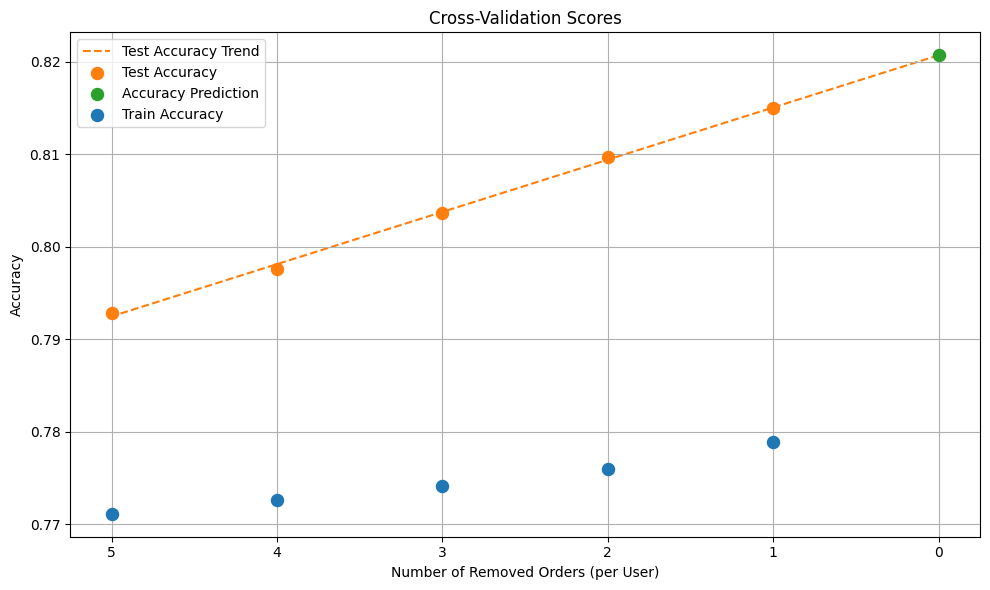

0.8207020328835088

In [62]:
accuracy = estimate_accuracy(grid_search_clf)
accuracy

### XGBoost

In [50]:
pipeline_steps = [('selector', DatasetSelector(prepared_splits_dict)),
                  ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))]

pipeline = Pipeline(pipeline_steps, verbose=False)

# param_grid = {
#     'xgb__n_estimators': [30, 100],
#     'xgb__max_depth': [5, 10],
#     'xgb__learning_rate': [0.01, 0.1],
#     'xgb__subsample': [0.4, 0.6, 0.8]
# }

param_grid = { # - 0.805
    'xgb__learning_rate': [0.1],
    'xgb__max_depth': [5],
    'xgb__n_estimators': [100],
    'xgb__subsample': [0.6]
}

grid_search_clf = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy', verbose=1,
                               n_jobs=2, return_train_score=True)
X = orders_tip_train[features]
y = orders_tip_train['tip'].astype(bool)

grid_search_clf.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=LastOrderUserTSCVSplitter(data_manager=<data_management.data_manager.DataManager object at 0x315188bd0>,
                                          n_splits=5),
             estimator=Pipeline(steps=[('selector',
                                        DatasetSelector(prepared_splits_dict={-8070716829487604255:          order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0                   2          3                  7                    15.0   
1                   3          3                 12                    21.0   
2                   4          4                  7                    29.0   
3                   5          4                 15                    28.0   
4                   6          2                  7                    19.0   
...               ...        ...                ...                     ...   
300865...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             n_jobs=2,
             param_grid={'xgb__learning_rate': [0.1], 'xgb__max_depth': [5],
                         'xgb__n_estimators': [100], 'xgb__subsample': [0.6]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [51]:
scores = get_best_cv_scores(grid_search_clf)
scores

,Test Accuracy,Train Accuracy
Fold 1,0.815876,0.780008
Fold 2,0.811647,0.777544
Fold 3,0.804602,0.775623
Fold 4,0.799395,0.773845
Fold 5,0.793839,0.772462
Mean,0.805072,0.775897


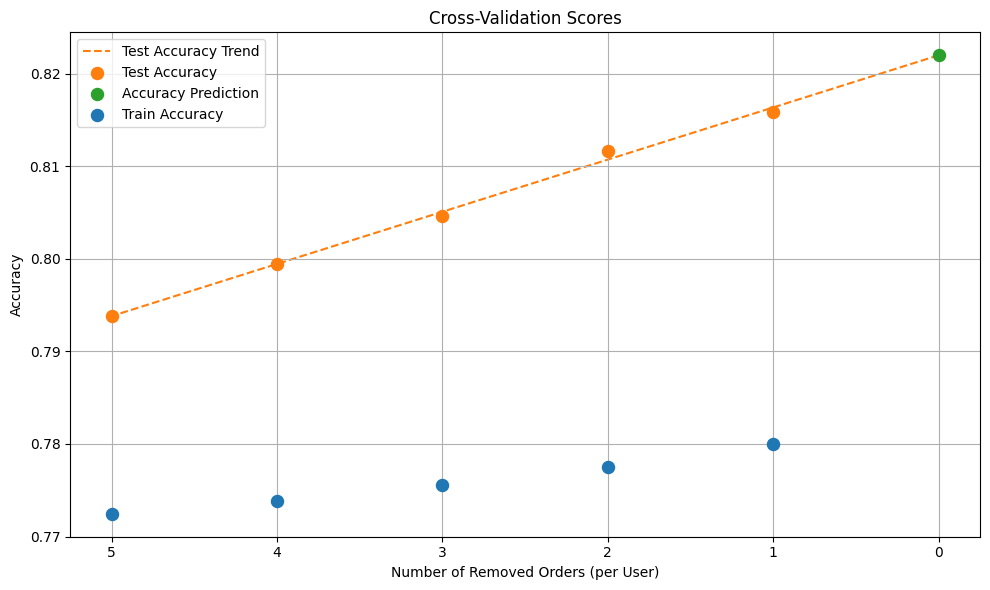

0.8219699478003596

In [52]:
accuracy = estimate_accuracy(grid_search_clf)
accuracy

### Logistic Regression

In [56]:
pipeline_steps = [('selector', DatasetSelector(prepared_splits_dict)),
                  ('scaler', StandardScaler()),
                  ('logreg', LogisticRegression(max_iter=1000))]

# cachedir = mkdtemp()
# memory = Memory(location=cachedir, verbose=0)

# pipeline = Pipeline(pipeline_steps, verbose=False, memory=memory)
pipeline = Pipeline(pipeline_steps, verbose=False)

# param_grid = {
#     'logreg__C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'logreg__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
# }
param_grid = {
    'logreg__C': [0.001],
    'logreg__solver': ['sag'],
}
# {'logreg__C': 0.001, 'logreg__solver': 'sag'} - 0.8025

grid_search_clf = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy', verbose=1,
                               n_jobs=2, return_train_score=True)
X = orders_tip_train[features]
y = orders_tip_train['tip'].astype(bool)

grid_search_clf.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=LastOrderUserTSCVSplitter(data_manager=<data_management.data_manager.DataManager object at 0x315188bd0>,
                                          n_splits=5),
             estimator=Pipeline(steps=[('selector',
                                        DatasetSelector(prepared_splits_dict={-8070716829487604255:          order_number  order_dow  order_hour_of_day  days_since_prior_order  \
0                   2          3                  7                    15.0   
1                   3          3                 12                    21.0   
2                   4          4                  7                    29.0   
3                   5          4                 15                    28.0   
4                   6          2                  7                    19.0   
...               ...        ...                ...                     ...   
300865...
3008655      -0.064174         -0.057342                    16  
3008656      -0.033737          0.028516                    25  
3008657      -0.037902         -0.016150                    36  
3008658      -0.083484         -0.109022                    49  
3008659      -0.064715         -0.072343                    64  

[2104923 rows x 19 columns]})),
                                       ('scaler', StandardScaler()),
                                       ('logreg',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=2,
             param_grid={'logreg__C': [0.001], 'logreg__solver': ['sag']},
             return_train_score=True, scoring='accuracy', verbose=1)

Coefficients: [[-0.3119426   0.00519016 -0.01266655 -0.02413098  0.80234     0.13194342
  -0.14177718  0.28415156 -0.25460318  0.62702972  0.07978431  0.32128219
   0.41837723  0.29800087 -0.04325284 -0.01717916  0.24361209  0.27499823
   0.10557493]]


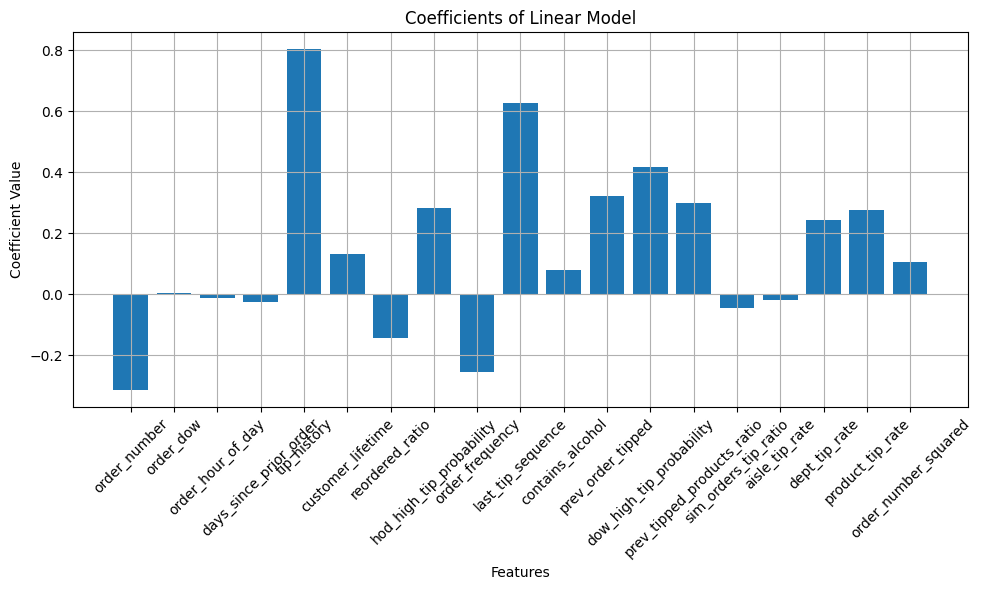

In [57]:
eval_logreg(grid_search_clf, features)

In [58]:
scores = get_best_cv_scores(grid_search_clf)
scores

,Test Accuracy,Train Accuracy
Fold 1,0.813277,0.776867
Fold 2,0.808806,0.774401
Fold 3,0.801825,0.772385
Fold 4,0.797280,0.770662
Fold 5,0.791026,0.769223
Mean,0.802443,0.772707


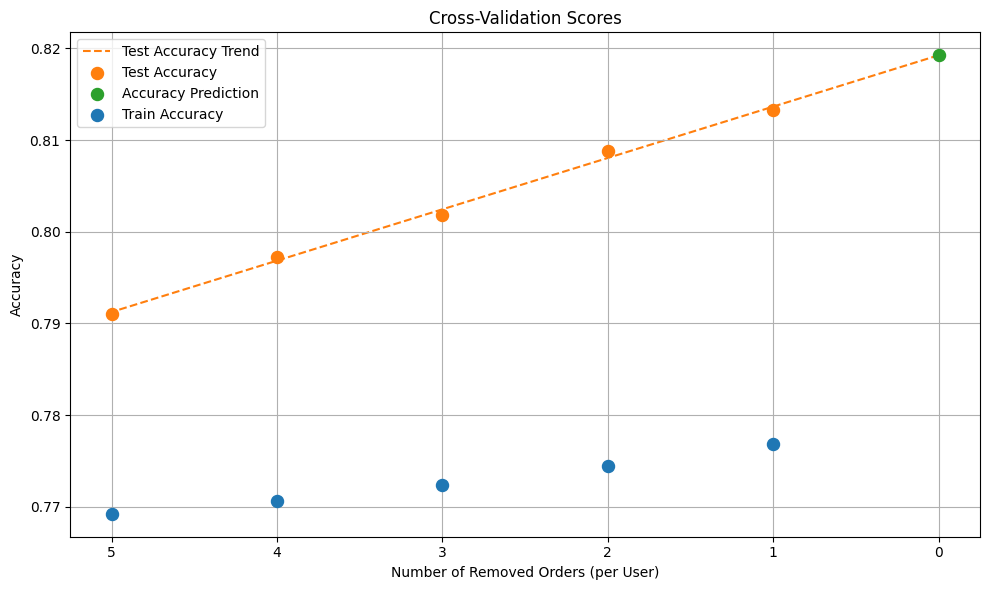

0.819250931761883

In [59]:
accuracy = estimate_accuracy(grid_search_clf)
accuracy

### Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Assuming 'DatasetSelector' and 'last_order_user_tscv_splitter' are defined somewhere in your code

# Define the pipeline steps
pipeline_steps = [('selector', DatasetSelector(prepared_splits_dict)),
                  ('scaler', StandardScaler()),
                  ('nb', GaussianNB())]

# Create the pipeline
pipeline = Pipeline(pipeline_steps, verbose=False)
# Define the parameter grid for GaussianNB (Naive Bayes does not have many hyperparameters to tune)
# param_grid = {
#     'nb__var_smoothing': [1e-9, 1e-10, 1e-11]
# }
param_grid = {
    'nb__var_smoothing': [1e-9]  # Variation smoothing parameter
}
# {'nb__var_smoothing': 1e-09} - 0.7841381709885383

# Set up GridSearchCV
grid_search_clf = GridSearchCV(pipeline, param_grid, cv=last_order_user_tscv_splitter, scoring='accuracy', verbose=1,
                               n_jobs=2, return_train_score=True)
# Assuming 'orders_tip_train' and 'features' are defined somewhere in your code
X = orders_tip_train[features]
y = orders_tip_train['tip'].astype(bool)

# Perform the grid search
grid_search_clf.fit(X, y)

In [ ]:
scores = get_best_cv_scores(grid_search_clf)
scores

In [ ]:
accuracy = estimate_accuracy(grid_search_clf)
accuracy

### Validation

In [61]:
# features = ['order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'order_size', 'tip_history',
#             'dynamic_feature_test_1', 'dynamic_feature_test_2']
#
# prepared_splits_dict = last_order_user_tscv_splitter.import_splits('data/prepared_data/', features)

In [62]:
# all_orders = data_manager.get_orders_tip(complete=True)
# all_orders.shape

In [63]:
# data_manager.set_subset(all_orders['order_id'])

In [64]:
# validation_test = data_manager.get_orders_tip_test()
# validation_test.shape

In [65]:
# validation_train = data_manager.get_orders_tip_train()
# validation_train.shape

In [66]:
# validation_train_without_first = validation_train[validation_train['order_number'] > 1]
# validation_train_without_first.shape

In [67]:
# prepared_splits_dict[-1147446606210854265].shape[0]

In [68]:
# all_orders_without_first = all_orders[all_orders['order_number'] > 1].reset_index(drop=True)
# all_orders_without_first.shape

In [69]:
# validation_train_without_first[features].reset_index(drop=True)

In [70]:
# prepared_splits_dict[-1147446606210854265]

In [71]:
# round(prepared_splits_dict[-1147446606210854265], 6).equals(round(validation_train_without_first[
#                                                                       features].reset_index(drop=True), 6))

In [72]:
# validation_test[features]

In [73]:
# prepared_splits_dict[4027820417624348460]

In [74]:
# round(prepared_splits_dict[4027820417624348460].reset_index(drop=True), 6).equals(round(
#     validation_test[features].reset_index(drop=True), 6))

### Prediction

In [169]:
orders_tip_test = data_manager.get_orders_tip_test().copy()

X_test = orders_tip_test[features]
y_pred = best_estimator.predict(X_test)

In [170]:
orders_tip_test['tip'] = y_pred
orders_tip_test['tip'].value_counts()

tip
False    90631
True     40578
Name: count, dtype: int64

In [171]:
orders_tip_test_csv = pd.merge(tip_test.drop('tip', axis=1), orders_tip_test[['order_id', 'tip']], on='order_id',
                               how='left')
orders_tip_test_csv.rename(columns={tip_test.columns[0]: ''}, inplace=True)
orders_tip_test_csv

,,order_id,tip
0,10,1187899,False
1,25,1492625,True
2,49,2196797,True
3,74,525192,True
4,78,880375,True
...,...,...,...
131204,3420838,2585586,True
131205,3420862,943915,True
131206,3420924,2371631,False
131207,3420933,1716008,False


In [172]:
# Checks
print(f"Number of orders: {len(orders_tip_test_csv)}")
print(f"Number of NaN tip values: {orders_tip_test_csv['tip'].isnull().sum()}")
print(f"Order IDs of template and result are equal: {tip_test['order_id'].equals(orders_tip_test_csv['order_id'])}")
print(
    f"Order IDs of prediction input and result are equal: {orders_tip_test['order_id'].reset_index(drop=True).equals(orders_tip_test_csv['order_id'])}")

Number of orders: 131209
Number of NaN tip values: 0
Order IDs of template and result are equal: True
Order IDs of prediction input and result are equal: True


In [173]:
orders_tip_test_csv.to_csv(os.path.join(DATA_DIR, 'tip_testdaten1.csv'), index=False)